<a href="https://colab.research.google.com/github/L0ureiro/Pedidos-e-Respostas-LAI/blob/main/DeepLearn%2BMlops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link Canvas: https://docs.google.com/document/d/184aWSNe6fq9TTrROpueIro6m2pnQyFddX-cQifP-I5k/edit?tab=t.0#heading=h.3ktfmkup4get

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install transformers torch datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Carregar o dataset
file_path = '/content/drive/MyDrive/DeepLearnin+Mlops/Cópia de pedidos.parquet'  # Atualize o caminho
df = pd.read_parquet(file_path)

In [4]:
df.head()

,index,IdPedido,ProtocoloPedido,Esfera,OrgaoDestinatario,Situacao,DataRegistro,ResumoSolicitacao,DetalhamentoSolicitacao,PrazoAtendimento,...,FormaResposta,OrigemSolicitacao,IdSolicitante,AssuntoPedido,SubAssuntoPedido,Tag,DataResposta,Resposta,Decisao,EspecificacaoDecisao
0,0,5194471,137000003202301,Federal,SGPR – Secretaria-Geral da Presidência da Repú...,Concluída,01/01/2023,Gastos Publicos,Solicito informar o valor gasto com a festa da...,08/02/2023,...,Pelo sistema (com avisos por email),Internet,0,Acesso à informação,,,19/01/2023,"Prezado(a) cidadão(ã), Em atenção ao pedido d...",Acesso Concedido,Resposta solicitada inserida no Fala.Br
1,1,5194479,10001000001202301,Federal,BACEN – Banco Central do Brasil,Concluída,01/01/2023,se tem saldo,gostaria de saber se tenho saldo a receber.,25/01/2023,...,Pelo sistema (com avisos por email),Internet,0,Acesso à informação,,,06/01/2023,"Prezado(a) senhor(a), Esclarecemos que o Ba...",Acesso Concedido,Orientação sobre como encontrar a informação s...
2,2,5194498,59014000001202342,Federal,DNOCS – Departamento Nacional de Obras Contra ...,Concluída,01/01/2023,Acesso à Água,Prezados Em relação ao Programa Cisternas q...,23/01/2023,...,Pelo sistema (com avisos por email),Internet,0,Água,,,03/01/2023,"Prezado Senhor, Cumprimentando-o cordialmen...",Acesso Concedido,Resposta solicitada inserida no Fala.Br
3,3,5194501,112000001202391,Federal,SGPR – Secretaria-Geral da Presidência da Repú...,Concluída,01/01/2023,Kjj,O que que funciona dentro do palacio do planalto,25/01/2023,...,Pelo sistema (com avisos por email),Internet,0,Acesso à informação,,,04/01/2023,"Prezado(a) Cidadão(ã), Em atenção ao pedido...",Acesso Concedido,Orientação sobre como encontrar a informação s...
4,4,5194509,23546000003202386,Federal,MEC – Ministério da Educação,Concluída,01/01/2023,Programa Nacional das Escolas Cívico-Militares,"Gostaria de solicitar, sobre o Programa Nacion...",23/01/2023,...,Pelo sistema (com avisos por email),Internet,5504522,Educação Básica,Programa Nacional das Escolas Cívico-Militares...,Secretaria de Educação Básica - SEB,17/01/2023,"Senhor Usuário, Em resposta a seu pedido...",Acesso Concedido,Resposta solicitada inserida no Fala.Br


-- CAMPOS: PEDIDOS
------------------------------
- IdPedido - inteiro: identificador único do pedido (não mostrado no sistema);
- ProtocoloPedido - texto(17): número do protocolo do pedido;
- Esfera - texto(30): esfera do órgão destinatário do pedido;
- OrgaoDestinatario  - texto(250): nome do órgão destinatário do pedido;
- Situacao - texto(200): descrição da situação do pedido;
- DataRegistro - Data DD/MM/AAAA : data de abertura do pedido;
- ResumoSolicitacao - texto(255): resumo do pedido;
- DetalhamentoSolicitacao - texto(2048): detalhamento do pedido;
- PrazoAtendimento - Data DD/MM/AAAA : data limite para atendimento ao pedido;
- FoiProrrogado - texto(3) "Sim" ou "Não" : informa se houve prorrogação do prazo do pedido;
- FoiReencaminhado - texto(3) "Sim" ou "Não": informa se o pedido foi reencaminhado;
- FormaResposta - texto(200): tipo de resposta escolhida pelo solicitante na abertura do pedido;
- OrigemSolicitacao - texto(50): informa se o pedido foi aberto em um Balcão SIC ou pela Internet;
- IdSolicitante - inteiro: identificador único do solicitante (não mostrado no sistema);
- AssuntoPedido - texto(200) : assunto do pedido atribuído pel SIC;
- SubAssuntoPedido - texto(200) : subassunto do pedido atribuída pelo SIC;
- Tag - texto(1024): as tags são marcadores no pedido para realizar classificações que não estão em assuntos/ subassuntos;
- DataResposta - Data DD/MM/AAAA : data da resposta ao pedido (campo em branco para pedidos que ainda estejam na situação "Em Tramitação");
- Resposta - texto(8000): resposta ao pedido;
- Decisao - texto(100) : tipo resposta dada ao pedido (campo em branco para pedidos que ainda estejam na situação "Em Tramitação");
- EspecificacaoDecisao - texto(200): subtipo da resposta dada ao pedido (campo em branco para pedidos que ainda estejam na situação "Em Tramitação");

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350368 entries, 0 to 350367
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   index                    350368 non-null  int64 
 1   IdPedido                 350368 non-null  int64 
 2   ProtocoloPedido          350368 non-null  int64 
 3   Esfera                   350368 non-null  object
 4   OrgaoDestinatario        350368 non-null  object
 5   Situacao                 350368 non-null  object
 6   DataRegistro             350368 non-null  object
 7   ResumoSolicitacao        335732 non-null  object
 8   DetalhamentoSolicitacao  350368 non-null  object
 9   PrazoAtendimento         350368 non-null  object
 10  FoiProrrogado            350368 non-null  object
 11  FoiReencaminhado         350368 non-null  object
 12  FormaResposta            350368 non-null  object
 13  OrigemSolicitacao        350368 non-null  object
 14  IdSolicitante       

In [6]:
# Distribuição de valores em 'Decisao'
print(df['Decisao'].value_counts())

Decisao
Acesso Concedido                                            243106
Não se trata de solicitação de informação                    34933
Acesso Negado                                                23739
Acesso Parcialmente Concedido                                18983
Informação Inexistente                                       12880
Órgão não tem competência para responder sobre o assunto      9066
Pergunta Duplicada/Repetida                                   7661
Name: count, dtype: int64


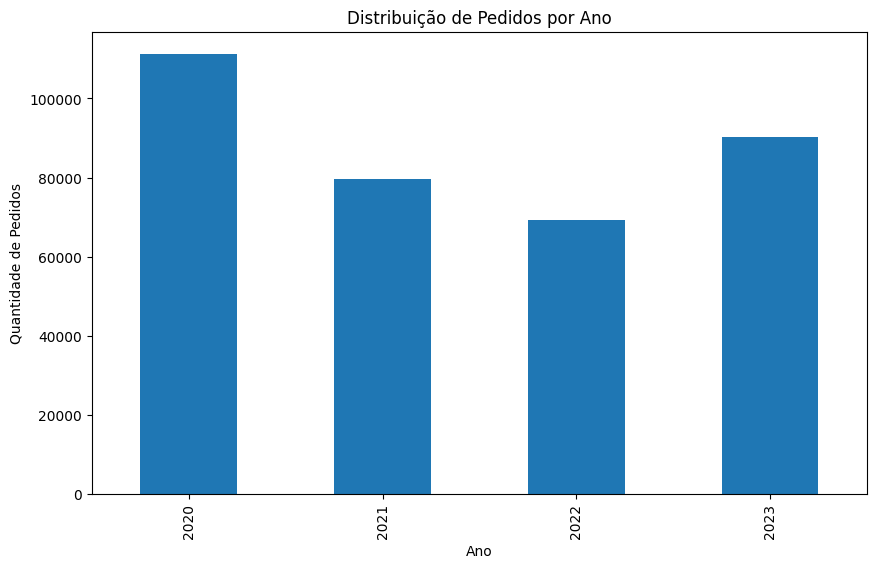

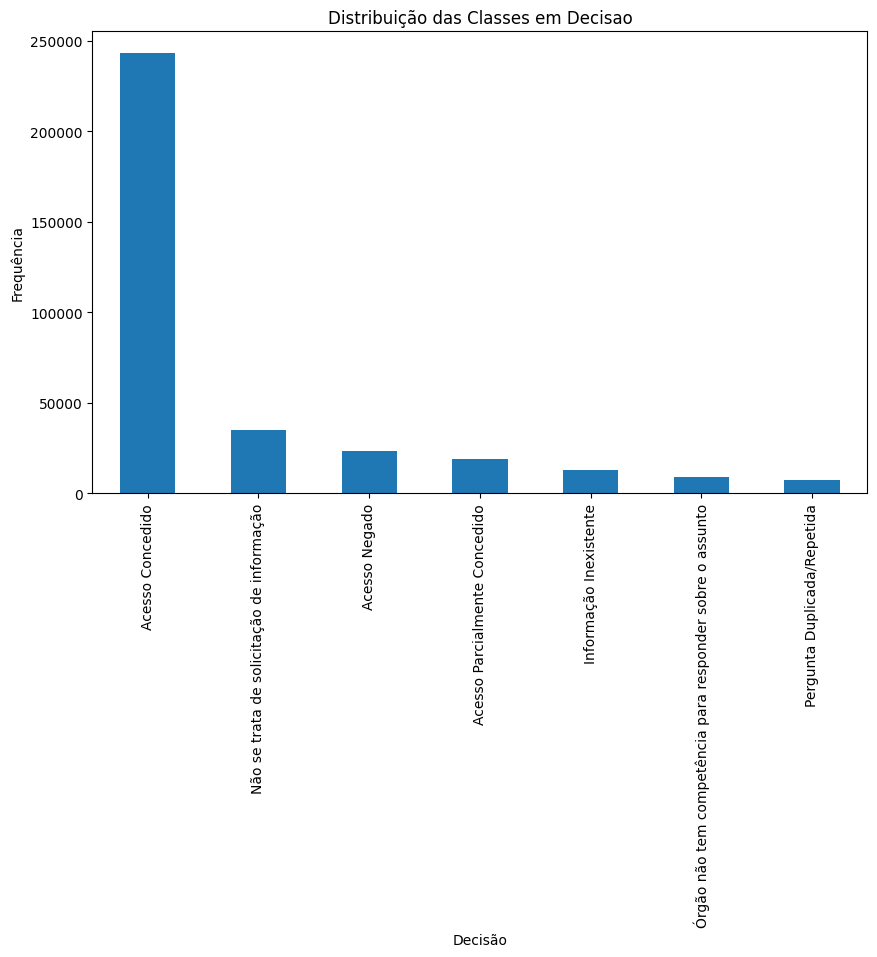

In [7]:
# Converter datas
df['DataRegistro'] = pd.to_datetime(df['DataRegistro'], format='%d/%m/%Y')

# Distribuição por ano
df['AnoRegistro'] = df['DataRegistro'].dt.year
df['AnoRegistro'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Pedidos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Pedidos')
plt.show()

# Distribuição das classes em 'Decisao'
df['Decisao'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição das Classes em Decisao')
plt.xlabel('Decisão')
plt.ylabel('Frequência')
plt.show()

In [8]:
# Remover entradas sem ResumoSolicitacao
df = df[~df['ResumoSolicitacao'].isnull()]
print(f"Quantidade de registros após remoção: {len(df)}")

Quantidade de registros após remoção: 335732


In [9]:
# Manter apenas as colunas relevantes
df_classifier = df[['ResumoSolicitacao', 'DetalhamentoSolicitacao', 'Decisao']].copy()
df_classifier.head()

,ResumoSolicitacao,DetalhamentoSolicitacao,Decisao
0,Gastos Publicos,Solicito informar o valor gasto com a festa da...,Acesso Concedido
1,se tem saldo,gostaria de saber se tenho saldo a receber.,Acesso Concedido
2,Acesso à Água,Prezados Em relação ao Programa Cisternas q...,Acesso Concedido
3,Kjj,O que que funciona dentro do palacio do planalto,Acesso Concedido
4,Programa Nacional das Escolas Cívico-Militares,"Gostaria de solicitar, sobre o Programa Nacion...",Acesso Concedido


In [10]:
# Concatenar as colunas textuais
df_classifier['texto_completo'] = df_classifier['ResumoSolicitacao'] + " " + df_classifier['DetalhamentoSolicitacao']

# Remover as colunas originais, se não forem mais necessárias
df_classifier = df_classifier[['texto_completo', 'Decisao']]

In [11]:
df_classifier

,texto_completo,Decisao
0,Gastos Publicos Solicito informar o valor gast...,Acesso Concedido
1,se tem saldo gostaria de saber se tenho saldo ...,Acesso Concedido
2,Acesso à Água Prezados Em relação ao Progra...,Acesso Concedido
3,Kjj O que que funciona dentro do palacio do pl...,Acesso Concedido
4,Programa Nacional das Escolas Cívico-Militares...,Acesso Concedido
...,...,...
350362,"Produção de medicamentos Boa noite, tenho uma ...",Não se trata de solicitação de informação
350363,Dúvida a respeito da quantidade de bolsas. No ...,Informação Inexistente
350364,Prorrogação de auxílio doenca Fiz um pedido de...,Acesso Concedido
350365,Óbitos Número de óbitos registrados por ano no...,Acesso Concedido


In [12]:
import re
import unicodedata

def preprocess_text(text: str) -> str:
    """
    Realiza o pré-processamento básico no texto.

    1. Remove caracteres não alfabéticos repetidos.
    2. Remove múltiplos espaços.
    3. (Opcional) Remove acentos.

    Args:
        text (str): O texto original.

    Returns:
        str: O texto pré-processado.
    """
    # Remover caracteres não alfabéticos repetidos (ex.: "!!!" → "!")
    text = re.sub(r'(\W)\1+', r'\1', text).strip()

    # Remover múltiplos espaços
    text = re.sub(r'\s+', ' ', text).strip()

    # Opcional: Normalizar para ASCII (remover acentos)
    # text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode()

    return text


In [13]:
df_classifier['texto_completo'] = df_classifier['texto_completo'].apply(preprocess_text)

## Map dos valores da coluna decisão para torna-la binaria

In [18]:
# Nome da coluna que queremos transformar
coluna_decisao = 'Decisao'

# Definir o mapeamento de categorias
mapeamento_binario = {
    'Acesso Concedido': 1,
    'Acesso Parcialmente Concedido': 1,
    'Órgão não tem competência para responder sobre o assunto': 0,
    'Pergunta Duplicada/Repetida': 0,
    'Informação Inexistente': 0,
    'Acesso Negado': 0,
    'Não se trata de solicitação de informação': 0
}

# Aplicar o mapeamento à coluna
df_classifier[coluna_decisao] = df_classifier[coluna_decisao].map(mapeamento_binario)

# Verificar os valores únicos após o mapeamento
print("\nValores únicos na coluna 'Decisao' após mapeamento:")
print(df_classifier[coluna_decisao].unique())


Valores únicos na coluna 'Decisao' após mapeamento:
[1 0]


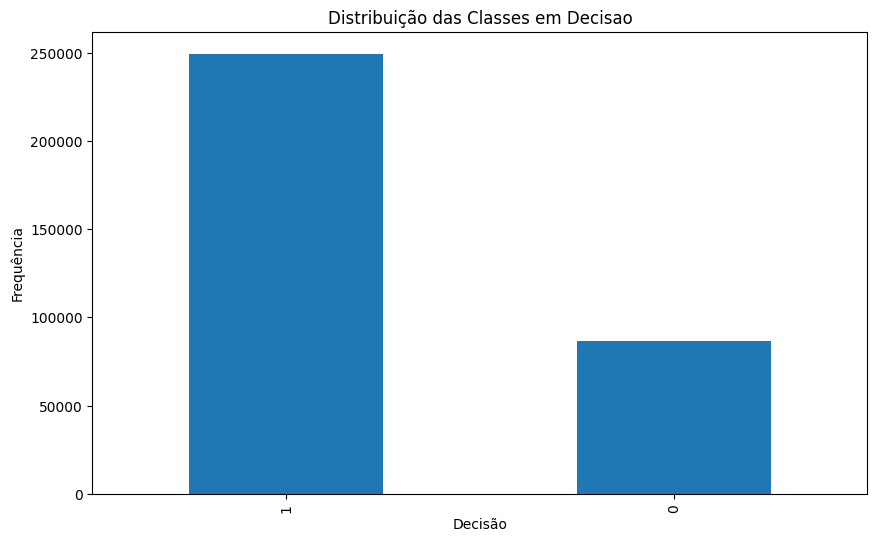

In [19]:
# Distribuição das classes em 'Decisao'
df_classifier['Decisao'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição das Classes em Decisao')
plt.xlabel('Decisão')
plt.ylabel('Frequência')
plt.show()

##Tokenização

In [37]:
# Importações
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from datasets import Dataset
from torch.utils.data import DataLoader

In [21]:
# Retirar essa celula quando for realizar o treinamento de verdade
# Reduzir o dataset para um número menor de entradas
df_classifier = df_classifier.sample(100, random_state=42).reset_index(drop=True)

In [20]:
# Nome do modelo do BERTimbau
model_name = "neuralmind/bert-base-portuguese-cased"

# Carregar o tokenizador e o modelo
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
# Dividir os dados
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_classifier['texto_completo'], df_classifier['Decisao'], test_size=0.2, stratify=df_classifier['Decisao']
)

# Criar Dataset para usar com Hugging Face
train_data = {'texto_completo': train_texts, 'Decisao': train_labels}
test_data = {'texto_completo': test_texts, 'Decisao': test_labels}

train_dataset = Dataset.from_dict(train_data)
test_dataset = Dataset.from_dict(test_data)

# Tokenizar os textos
def tokenize_function(examples):
    return tokenizer(
        examples['texto_completo'],
        padding="max_length",  # Garantir que todos tenham o mesmo comprimento
        truncation=True,       # Truncar textos muito longos
        max_length=512,        # Comprimento máximo aceito pelo BERT
    )

# Tokenizar os datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

## Preparando o bert

In [34]:
# Renomear a coluna 'Decisao' para 'labels' (necessário para o modelo)
train_dataset = train_dataset.rename_column("Decisao", "labels")
test_dataset = test_dataset.rename_column("Decisao", "labels")

# Remova apenas a coluna 'texto_completo' agora que 'Decisao' foi renomeada
train_dataset = train_dataset.remove_columns(["texto_completo"])
test_dataset = test_dataset.remove_columns(["texto_completo"])

# Configure o formato do dataset para PyTorch tensors
train_dataset.set_format("torch")
test_dataset.set_format("torch")

# Criar DataLoaders
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)

# Configurar o otimizador
optimizer = AdamW(model.parameters(), lr=5e-5)



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
print(train_dataset)
print(test_dataset)


Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 80
})
Dataset({
    features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 20
})


In [35]:
import torch
from torch.nn import CrossEntropyLoss
from torch.nn.functional import softmax

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

num_epochs = 3  # Número de épocas

# Configurar o scheduler
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)



for epoch in range(num_epochs):
    # Treinamento
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {total_loss / len(train_dataloader)}")


Epoch 1/3 - Loss: 0.5462902426719666
Epoch 2/3 - Loss: 0.458018034696579
Epoch 3/3 - Loss: 0.41232611835002897


In [38]:
    # Avaliação
    model.eval()
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(softmax(logits, dim=-1), dim=-1)

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predictions.cpu().numpy())

    # Relatório detalhado
    print(classification_report(true_labels, predicted_labels, target_names=["Classe 0", "Classe 1"]))


              precision    recall  f1-score   support

    Classe 0       0.00      0.00      0.00         4
    Classe 1       0.80      1.00      0.89        16

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
